## COMP3670 Programming Assignment 1 - Linear Algebra and Analytic Geometry
---

**Enter Your Student ID:**

**Your Name:**
    
**Deadline:**23/8

**Submit:** Write your answers in this file, and submit a single Jupyter Notebook file (.ipynb) on Wattle. Rename this file with your student number as 'uXXXXXXX.ipynb'.

**Enter Discussion Partner IDs Below:**


---
**Marking distribution for the homework/assignment**

- Task1 = 10%
- Task2 = 40%
- Task3 = 10%
- Task4 = 40%

## Task 0: Introduction
---

**NOTE:** *This part of the first assignment is by necessity somewhat tedious as its primary purpose is to introduce syntax, how to access and understand the Numpy documentation and some very basic concepts. If you are already familiar with Numpy, you can just read the **TASK** headings and complete the questions without worrying about all the additional information. This is designed for people who have never seen Numpy before, so it's a very easy 1st year style introduction to just introduce syntax.*

*As this is a third year subject, it is assumed you already know to to program well (but may be unfamiliar with Python and Numpy).*

---

Arguably the most fundamental tool needed to engage with machine learning in Python is Numpy *(np)*. To include Numpy in any project, simply type the following line at the top of your python file:

In [2]:
# numpy
import numpy as np


!pip install sympy
import sympy as sp

# display
from IPython.core.display import HTML

# matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [4]:
# check if numpy can be imported
import numpy as np

print('Done')

Done


A Jupyter Notebook is divided into cells, each of which works like a Python module or Latex file. When a cell is run, any cells that follow it will have access to its results. Running the above cell will give all following cells access to the Numpy library.

-----------

   **TASK 0.1:** To run the above cell, select it by clicking on it, hold **shift** and press **return**. If you have succeeded, then the cell will print "Done" just above.


-----------

Numpy is a library of common mathematical data structures and algorithms used in machine learning. For example:

- It allows you to declare vectors and matrices, with all the associated mathematical operations like matrix vector products, matrix addition / subtraction.
- It provides convenient, efficient implementations of algorithms to solve matrix equations, find the inverse of a matrix or perform Eigen decomposition. The implementation of these algorithms is compiled from C code, making Numpy much faster than programming these algorithms yourself in Python.

You'll need to know Numpy inside and out. We'll start by getting you familiar with the easy to access online documentation and performing a few basic operations.

Below I have declared the matrices: 

$$A = 
\begin{bmatrix}
2&3\\
0&1\\
\end{bmatrix}
\\
x = 
\begin{bmatrix}
1\\
3\\
\end{bmatrix}
$$. 

---
**TASK 0.2:** Run the cell below and observe what it prints.


---
(If it throws an error, you have the wrong version of python installed. This entire course will use Python 3, not Python 2)



In [2]:
A = np.array([[2, 3], [0, 1]])
x = np.array([[1], [3]])

#Matrix Multiplication Example
b = A @ x
print('\nMatrix Multiplication')
print(b)


Matrix Multiplication
[[11]
 [ 3]]


The above code illustrates how to perform matrix multiplication. Memorise it. Below are some other basic operations you'll likely need over the coming semester:

In [3]:
#Matrix Addition Example
b = A + x
print('\nMatrix Addition')
print(b)

#Elementwise Multiplication Example
b = A * x
print('\nElementwise Matrix Multiplication')
print(b)

#Extract a single element of a matrix:
print('\nSingle Element Extraction')
b = A[0, 0]
print(b)

#Extract an entire column of a matrix:
print('\nColumn Extraction')
b = A[:, 0]
print(b)

#Extract an entire row of a matrix:
print('\nRow Extraction')
b = A[0, :]
print(b)

#Transpose of a matrix:
print('\nTranspose')
A_Transpose = A.T
print(A_Transpose)


Matrix Addition
[[3 4]
 [3 4]]

Elementwise Matrix Multiplication
[[2 3]
 [0 3]]

Single Element Extraction
2

Column Extraction
[2 0]

Row Extraction
[2 3]

Transpose
[[2 0]
 [3 1]]


## Task1: Solving a system of linear equations
---

A vital part of linear algebra is to know how to solve a system of linear equations. For e.g. 

$$a_{11}x_1+a_{12}x_2 \dots a_{1d}x_d=b_1$$
$$a_{21}x_1+a_{22}x_2 \dots a_{2d}x_d=b_2$$
$$\vdots$$
$$a_{n1}x_1+a_{n2}x_2 \dots a_{nd}x_d=b_n$$

The above system of linear equations can also be written down in a compact matrix form as follows:

$$AX = B$$

where,
$$A = \begin{bmatrix}
a_{11} & \dots & a_{1d}\\
\vdots & \ddots & \vdots \\
a_{n1} & \dots & a_{nd}
\end{bmatrix}, \quad
B = \begin{bmatrix}
b_1 \\ \vdots \\ b_n
\end{bmatrix}, \quad
X = \begin{bmatrix}
x_1 \\ \vdots \\ x_d
\end{bmatrix}.
$$

---
**Task 1.1**: Use numpy's solve function to compute X

---
**HINT**: https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html

In [5]:
# define A,B
A = np.array([[2, 3], [0, 1]])
B = np.array([[3], [5]])

def solve_with_numpy(A,B):
    ## YOUR CODE HERE
    return np.linalg.solve(A, B)
    

# show solution
X = solve_with_numpy(A,B)
print (X)

[[-6.]
 [ 5.]]


A more hands on way for solving for X, involves computing first computing the inverse of the matrix $A$

---
**Task 1.2**: Use numpy's inbuilt method for computing the inverse of the matrix $A$

---

**HINT**: https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html

In [14]:
A = np.array([[2, 3], [0, 1]])

A_inv = np.linalg.inv(A) #YOUR CODE HERE
#print(A_inv)
# check if A * A_inv = I
assert A_inv is not None,"Inverse not implemented!"
assert np.all(A@A_inv == np.eye(A.shape[0])),"Inverse seems incorrect"
HTML('<div class="alert alert-block alert-success">The inverse matrix looks good</div>')

[[ 0.5 -1.5]
 [ 0.   1. ]]


---
**Task 1.3**: Use the inverse of matrix $A$, to solve for $X$

---

In [16]:
A = np.array([[2, 3], [0, 1]])
B = np.array([[3], [5]])

# YOUR CODE HERE
X = np.linalg.inv(A)@B

print(X)

[[-6.]
 [ 5.]]


But what if $A$ is not a square matrix?

---
**Task 1.4**: Compute the Moore-Penrose pseudo inverse for matrix $A$ and use it for computing $X$. Note that, you must not directly use `np.linalg.pinv` for computing the pseudo-inverse.

---

**HINT**: https://en.wikipedia.org/wiki/Moore–Penrose_inverse

In [19]:
A = np.array([[1, 3], [2, 7], [5, 1]])
B = np.array([[13], [30], [9]])

tmp=A.T@A
A_pseudo_inverse=np.linalg.inv(tmp)@A.T
X = A_pseudo_inverse@B #YOUR CODE HERE

# check if everything is good
assert A_pseudo_inverse is not None,"Inverse not implemented!"
assert X is not None,"X not solved!"
assert np.sum(abs(A_pseudo_inverse - np.linalg.pinv(A)))<1e-6,"Pseudo inverse seems incorrect"
assert np.sum(abs(X-np.linalg.lstsq(A,B,rcond=None)[0]))<1e-6,"X seems incorrect"
HTML('<div class="alert alert-block alert-success">The inverse matrix looks good</div>')

## Task 2: Computing inverse of a matrix using Gauss–Jordan elimination

---
In the last task, we used numpy's inbulit functions to compute the inverse of the matrix $A$. Lets see how it is done without using numpy!

So we want to find the matrix $A^{-1}$ such that:

$$A A^{-1} = I$$

This can be done by performing row operations on the matrix $A$, to get an identity matrix while at the same time performing similar row operations on the identity matrix on the right hand side. 

Read more: https://en.wikipedia.org/wiki/Gaussian_elimination#Finding_the_inverse_of_a_matrix

But, first lets practice Gaussian elimination!

---
**Task 2.1**:  Complete the following gaussian elimnation function to compute the reduced row-echelon form of matrix $A$. You must implement the gaussian elimination algorithm yourself, not merely call someone elses library function.

---

**HINT:** https://en.wikipedia.org/wiki/Gaussian_elimination

In [8]:
A = np.array([[1, 0, 1, 1],
             [1, 0, 1, 1],
             [0, 1, 1, 1],
             [1, 1, 1, 0],
             [1, 1, 1, 0]])
def gaussian_elim(A):
    h=0
    k=0
#     print(A)
    while h<len(A) and k<len(A[0]):
        Max=-1
        I=0
        for i in range(h,len(A)):
            if abs(A[i,k])>I:
                Max=i
                I=abs(A[i,k])
        if I==0:
            k=k+1
        else:            
            #return None
            tmp=np.array(A[Max,:])
            A[Max,:]=A[h,:]
            A[h,:]=tmp
            #swap(A[i_max,:],A[h,:])
            for i in range(h+1,len(A)):
                div=A[i,k]/A[h,k]
#               force to 0
                A[i,k]=0
                #return None
                for j in range(k+1,len(A[0])):
                    A[i,j]=A[i,j]-A[h,j]*div
            tmp=A[h,k]
            for j in range(len(A[0])):
                A[h,j]=A[h,j]/tmp
            h=h+1
            k=k+1
#     print(A)
    m=len(A)-1
    while m>=0:
        n=0
        while n<len(A[0])-1 and A[m,n] ==0:
            n=n+1
        if A[m,n]==1:
            for i in range(0,m):
                div=A[i,n]/A[m,n]
                A[i,n]=0
                for j in range(n+1,len(A[0])):
                    A[i,j]=A[i,j]-A[m,j]*div
        m=m-1
    return A

print(gaussian_elim(A))

[[ 1  0  0 -1]
 [ 0  1  0 -1]
 [ 0  0  1  2]
 [ 0  0  0  0]
 [ 0  0  0  0]]


In [9]:
# test your gaussian_elim function
def test_gaussian_elim():
    for i in range(100):
        m,n = np.random.randint(low=5,high=10,size=2)
        a = np.random.randn(m,n)
        sol1 = gaussian_elim(a)
        sol2 = np.array(sp.Matrix(a).rref()[0])
        if np.sum((sol1-sol2)**2) > 1e-6:
            print (a,"\n")
            print (gaussian_elim(a),"\n")
            print (np.array(sp.Matrix(a).rref()[0]),"\n")
            return False
    return True


assert test_gaussian_elim(),"Implementation incorrect!"
HTML('<div class="alert alert-block alert-success">Gaussian elimination function looks good!</div>')

---
**Task 2.2**:  Comment on how you would tell if a square matrix is invertible by observing its reduced row-echelon form.

---

**Answer**: If a square matrix is invertible, it must be a non-singular matrix, so if a square matrix's rank is equal to the order. the matrix is invertible.

---
**Task 2.3**:  Modify the gaussian elimination function to also perform similar row operations on the identity matrix to compute the inverse a square matrix $A$. The *compute_inverse* function should be according to following specifications: 
* Take as input any square matrix $A$.
* Return:
    - None if $A$ is non-invertible.
    - $A^{-1}$ otherwise. 

---

**HINT:** https://en.wikipedia.org/wiki/Gaussian_elimination#Finding_the_inverse_of_a_matrix

In [13]:
A = np.array([[2, 3], [1, 1]])

# compute inverse using Gaussian-Jordan elimination
def compute_inverse(A):
    A=A.astype(float)
    B=np.eye(len(A))
    h=0
    k=0
#     print(A)
    while h<len(A) and k<len(A[0]):
        Max=-1
        I=0
        for i in range(h,len(A)):
            if abs(A[i,k])>I:
                Max=i
                I=abs(A[i,k])
        if I==0:
            k=k+1
        else:            
            #return None
            tmp=np.array(A[Max,:])
            A[Max,:]=A[h,:]
            A[h,:]=tmp
            tmp_=np.array(B[Max,:])
            B[Max,:]=B[h,:]
            B[h,:]=tmp_
            #swap(A[i_max,:],A[h,:])
            for i in range(h+1,len(A)):
                div=A[i,k]/A[h,k]
#               force to 0
                A[i,k]=0
                #return None
                for j in range(k+1,len(A[0])):
                    A[i,j]=A[i,j]-A[h,j]*div
                for j in range(len(A[0])):
                    B[i,j]=B[i,j]-B[h,j]*div
            tmp=A[h,k]
            for j in range(len(A[0])):
                A[h,j]=A[h,j]/tmp
                B[h,j]=B[h,j]/tmp
            h=h+1
            k=k+1
#     print(A)
    m=len(A)-1
    while m>=0:
        n=0
        while n<len(A[0])-1 and A[m,n] ==0:
            n=n+1
        if A[m,n]==1:
            for i in range(0,m):
                div=A[i,n]/A[m,n]
                A[i,n]=0
                for j in range(n+1,len(A[0])):
                    A[i,j]=A[i,j]-A[m,j]*div
                for j in range(len(A[0])):
                    B[i,j]=B[i,j]-B[m,j]*div
        m=m-1
    flag=0
    for i in range(len(A)):
        if A[len(A)-1,i]!=0:
            flag=1
            break
    if flag==1:
        return B
    return None
    # YOUR CODE HERE

# compute inverse
A_inv = compute_inverse(A)
print (A_inv)

[[-1.  3.]
 [ 1. -2.]]


In [14]:
# test the inverse function
def test_compute_inverse():
    # separate check when A is non-invertible
    A = np.array([[2, 1], [4, 2]])
    A_inv = compute_inverse(A)
    assert A_inv is None,"Inverse should be None, if A is non-invertible"
    
    for i in range(1000):
        m = np.random.randint(low=5,high=10)
        A = np.random.randint(low=0,high=10,size=(m,m))
        A_inv = compute_inverse(A)
        if A_inv is None:
            if abs(np.linalg.det(A)) > 1e-6:
                print ("A: \n{}\n".format(A))
                print ("A_inv: \n{}\n".format(A_inv))
                return False
        elif not np.sum(np.abs(A@A_inv - np.eye(A.shape[0]))) < 1e-6:
            print ("A: \n{}\n".format(A))
            print ("A_inv: \n{}\n".format(A_inv))
            return False
    return True

assert test_compute_inverse(),"Inverse is not correct"
HTML('<div class="alert alert-block alert-success">compute inverse function looks good!</div>')

## Task 3: Geometrical intuition for system of linear equations

---

In this task we will develop a geometrical intuition for solving the system of linear equations:

$$AX=B$$

where if you recall from before:

$$A = \begin{bmatrix}
a_{11} & \dots & a_{1d}\\
\vdots & \ddots & \vdots \\
a_{n1} & \dots & a_{nd}
\end{bmatrix}, \quad
B = \begin{bmatrix}
b_1 \\ \vdots \\ b_n
\end{bmatrix}, \quad
X = \begin{bmatrix}
x_1 \\ \vdots \\ x_d
\end{bmatrix}.
$$

This can also be written as:
$$
\begin{bmatrix}
a_{11} \\ \vdots \\ a_{n1}
\end{bmatrix} \ x_1
+ 
\begin{bmatrix}
a_{12} \\ \vdots \\ a_{n2}
\end{bmatrix} \ x_2
+ \dots
\begin{bmatrix}
a_{1d} \\ \vdots \\ a_{nd}
\end{bmatrix} \ x_d
= \begin{bmatrix}
b_1 \\ \vdots \\ b_n
\end{bmatrix}
$$

Thats is, solving the system of linear equations $AX=B$ is equivalent to finding a linear combination of the column vectors of matrix $A$, that result in $B$.

---
**Task 3.1**: Given a matrix $A$ of shape (2 X 2), generate a plot containing arrows representing the column vectors of $A$.

---
**HINTS:** 

- For $A=I$, the plot should look something like:
![title](https://upload.cc/i1/2019/08/01/LqQUbB.png)
- You'll need to use plt.quiver() with angles='xy', scale_units='xy' and scale=1. 
    - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.quiver.html
- You'll need use '*origin' as the origin of the quiver plot, including the asterix.

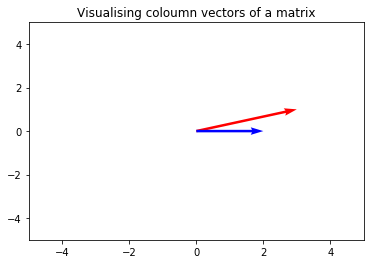

In [55]:
origin = [0], [0]

A = np.array([[2, 3], [0, 1]])

#YOUR CODE HERE
plt.quiver(*origin,A[0][1],A[1][1],angles='xy',scale_units='xy',scale=1,color='red')
plt.quiver(*origin,A[0][0],A[1][0],angles='xy',scale_units='xy',scale=1,color='blue')

plt.xlim([-5,5])
plt.ylim([-5,5])
plt.title('Visualising coloumn vectors of a matrix')
plt.show()

---
**Task 3.2**: To the above plot, now add an arrow (with different color) representing vector $B$. While doing so remember to:
* Assign different labels to the arrows for matrix $A$ and $B$, using the keyword `label=A` or `label=B`.
* Display the appropriate legend, with proper labels. Read more: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html
* Assign colored arrows for matrix $A$ as `color=red` and arrow for vector $B$ as `color=blue`
---

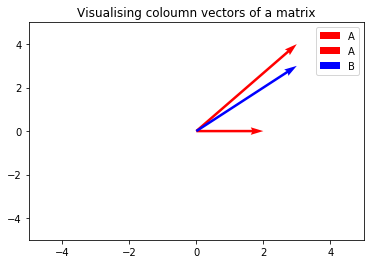

In [15]:
origin = [0], [0]

A = np.array([[2, 3], [0, 4]])
B = np.array([[3], [3]])

#YOUR CODE HERE
plt.quiver(*origin,A[0][1],A[1][1],color='red',angles='xy',scale_units='xy',scale=1,label='A')
plt.quiver(*origin,A[0][0],A[1][0],color='red',angles='xy',scale_units='xy',scale=1,label='A')
plt.quiver(*origin,B[0,0],B[1,0],color='blue',angles='xy',scale_units='xy',scale=1,label='B')

plt.xlim([-5,5])
plt.ylim([-5,5])
plt.legend()
plt.title('Visualising coloumn vectors of a matrix')
plt.show()

The above plot should convey a more intuitve picture than the simply looking at $AX=B$. Let's test our intuition!

---
**Task 3.3**: Without calculating, for $X = [x_1 \ x_2]^T$, analytically comment on the magnitude of $x_1$ and $x_2$. That is choose one of the following:
1. $|x_1| > |x_2|$
2. $|x_1| < |x_2|$
3. $|x_1| \approx |x_2|$

---

**Answer**
$|x_2| > |x_1|$ from the plot above, it is clearly that A1's length is greater than A2's.

## Task 4: Gram-Schmidt orthogonalization

The Gram-Schmidt algorithm is used for finding an orthonormal basis for the subspace spanned by a set of vectors.

---
**Read more:** https://en.wikipedia.org/wiki/Gram–Schmidt_process

---
**Task 4.1**: Given two linearly independent but non-orthogonal vectors $u_1,u_2$, write down the equations for computing the orthogonal basis $\{v_1,v_2\}$ for subspace covered by $\{u_1,u_2\}$.

---

**Answer** 
$$v_1=u_1$$
$$v_2=u_2-\frac{{\langle}u_2,v_1{\rangle}}{{\langle}v_1,v_1{\rangle}}v_1$$

---
**Task 4.2**: Briefly show that $v_1, v_2$ are orthogonal.

---

**Answer**
when$$v_1=u_1$$
using dot product.
$${\langle}v_1,v_2{\rangle}=u_1u_2=\frac{u_2u_1}{u_1u_1}u_1u_1=0$$
So $$v_1 and v_2$$ are orthogonal

---
**Task 4.3**: Implement a function that finds an orthonormal basis of column vectors for matrix $A$. The *gram_schmidt* function should be according to following specifications: 
* Take as input any matrix $A$.
* Return a matrix with the orthonormal basis vectors as the columns.

---
**NOTE**: The resulting basis should be orthonormal, so each basis vector should be of norm 1.

In [16]:
# Find orthonormal basis using gram-schmidt 
A=np.array([[1,0,1,0,0,0],
            [0,0,1,0,1,0],
            [1,0,0,0,1,0]])
B=np.array([[2,9,4,5,3],
            [4,7,0,5,5],
            [0,2,5,7,3],
            [3,1,1,4,0],
            [6,0,1,1,9],
            [3,4,0,1,9],
            [5,7,1,0,5]])
def gossin(A):
    h=0
    k=0
#     print(A)
    while h<len(A) and k<len(A[0]):
        Max=-1
        I=0
        for i in range(h,len(A)):
            if abs(A[i,k])>I:
                Max=i
                I=abs(A[i,k])
        if I==0:
            k=k+1
        else:            
            #return None
            tmp=np.array(A[Max,:])
            A[Max,:]=A[h,:]
            A[h,:]=tmp
            #swap(A[i_max,:],A[h,:])
            for i in range(h+1,len(A)):
                div=A[i,k]/A[h,k]
#               force to 0
                A[i,k]=0
                #return None
                for j in range(k+1,len(A[0])):
                    A[i,j]=A[i,j]-A[h,j]*div
            tmp=A[h,k]
            for j in range(len(A[0])):
                A[h,j]=A[h,j]/tmp
            h=h+1
            k=k+1
#     print(A)
    m=len(A)-1
    while m>=0:
        n=0
        while n<len(A[0])-1 and A[m,n] ==0:
            n=n+1
        if A[m,n]==1:
            for i in range(0,m):
                div=A[i,n]/A[m,n]
                A[i,n]=0
                for j in range(n+1,len(A[0])):
                    A[i,j]=A[i,j]-A[m,j]*div
        m=m-1
    return A

def square(A):
    stand=0
    for i in A:
        stand+=i*i
    return stand
def check(A,i):
    if i>=len(A) or i>=len(A[0]) or A[i,i]!=1:
        return False
    for p in range(i-1):
        if A[p,i]!=0 or A[i,p]!=0:
            return False
    return True

def gram_schmidt(A):
    A=gossin(A)
    l=0
    for i in range(len(A[0])):
        if check(A,i):
            l+=1
        else:
            break
    #print(l)
    #The number of orthonormal basis of column vectors is equal to the rank of the vector group, which can represent the basis, at the same time it is orthonormal
    return np.eye(l)

print(gram_schmidt(B))

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [238]:
def orthonormality_checker(A):    
    # check orthonormality: for an orthonormal matrix A.T@A = I
    is_orthogonal = (np.sum(np.abs((A.T@A - np.eye(A.shape[1]))**2)) < 1e-6)
    return is_orthogonal


# test gaussian_elim function
def test_gram_schmidt():
    for i in range(100):
        m,n = np.random.randint(low=5,high=10,size=2)
        a = np.random.randint(low=0,high=10,size=(m,n))
        orthonormal_basis = gram_schmidt(a)
        if not orthonormality_checker(orthonormal_basis):
            # display the matrix for which the method fails
            print (a,"\n")
            return False
    return True

assert test_gram_schmidt(),"Resulting basis vectors are not orthonormal!"
HTML('<div class="alert alert-block alert-success">Gram-schmidt orthogonalization function looks good!</div>')

---
**END OF ASSIGNMENT**
___